data

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

data={
    "Hours_studied":[1, 2, 2.5, 3, 3.5, 4, 5, 6, 6.5, 7, 8, 9],
    "Passed":[0,0,0,0,0,1,1,1,1,1,1,1]
}
df=pd.DataFrame(data)

Features and Labels

In [ ]:
X=df[['Hours_studied']]
Y=df['Passed']

split dataset


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

Logistic regreesion model


In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

prediction


In [ ]:
Y_pred=model.predict(X_test)

Evaluate

In [ ]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Predict for new student


In [ ]:
hours = 4.5
prob = model.predict_proba([[hours]])[0][1]
prediction = model.predict([[hours]])[0]
print(f"Predicted Probability of Passing if studied {hours} hours: {prob:.2f}")
print("Prediction:", "Pass" if prediction == 1 else "Fail")

Predicted Probability of Passing if studied 4.5 hours: 0.69
Prediction: Pass


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Visualization


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


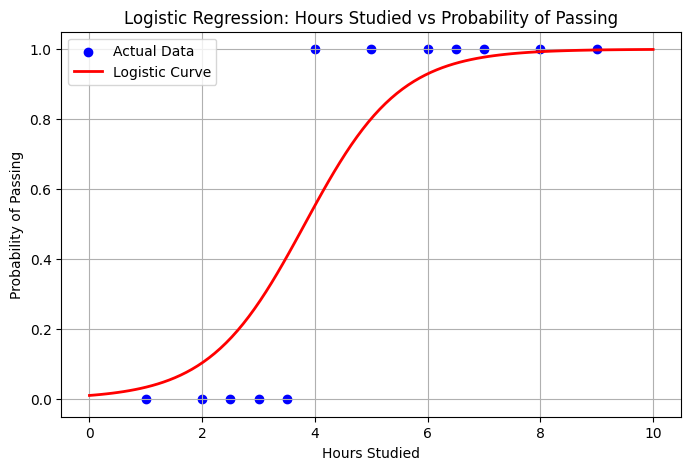

In [ ]:
import numpy as np
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_probs = model.predict_proba(X_plot)[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_plot, y_probs, color='red', linewidth=2, label='Logistic Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Hours Studied vs Probability of Passing')
plt.legend()
plt.grid(True)
plt.show()